<a href="https://colab.research.google.com/github/miwith360on/Loan-Default-Prediction/blob/main/credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload the file from your computer
from google.colab import files
uploaded = files.upload()

# Load the uploaded CSV into a DataFrame
import pandas as pd
import io

# Replace 'cleaned_loan_default_data.csv' with your file name
loan_data = pd.read_csv(io.BytesIO(uploaded['cleaned_loan_default_data.csv']))

# Display the first few rows of the dataset
loan_data.head()


Saving cleaned_loan_default_data.csv to cleaned_loan_default_data.csv


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


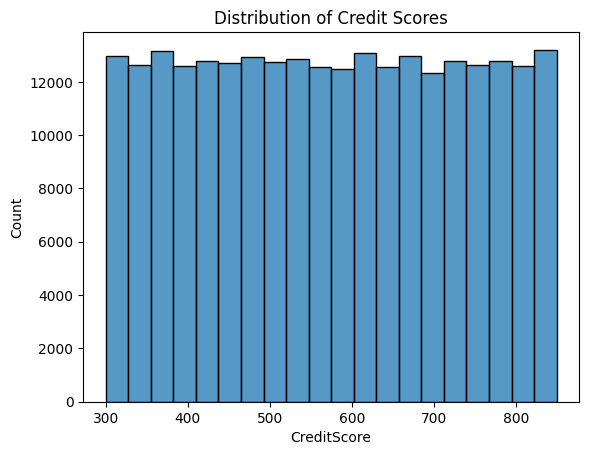

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Credit Score
sns.histplot(loan_data['CreditScore'], bins=20)
plt.title('Distribution of Credit Scores')
plt.show()


In [3]:
# Check for missing values
loan_data.isnull().sum()


,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the features and target variable
X = loan_data[['InterestRate', 'LoanAmount', 'CreditScore', 'Income', 'Age', 'DTIRatio', 'MonthsEmployed']]
y = loan_data['Default']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.89


In [5]:
from sklearn.metrics import classification_report, roc_auc_score

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.59      0.02      0.05      5900

    accuracy                           0.89     51070
   macro avg       0.74      0.51      0.49     51070
weighted avg       0.85      0.89      0.84     51070

ROC-AUC Score: 0.74
